In [1]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile


Mounted at /content/drive


In [2]:

zip_path = '/content/drive/MyDrive/ADNI/PD T2/voxel2.zip'
extract_path = '/content/data'  # Spécifiez le chemin où vous voulez extraire les fichiers

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
import nibabel as nib

# Charger le fichier NIfTI
image = nib.load('/content/data/AD/I100111.nii.gz')

# Obtenir le shape des données
shape = image.shape

print("Shape des données :", shape)


Shape des données : (43, 256, 256)


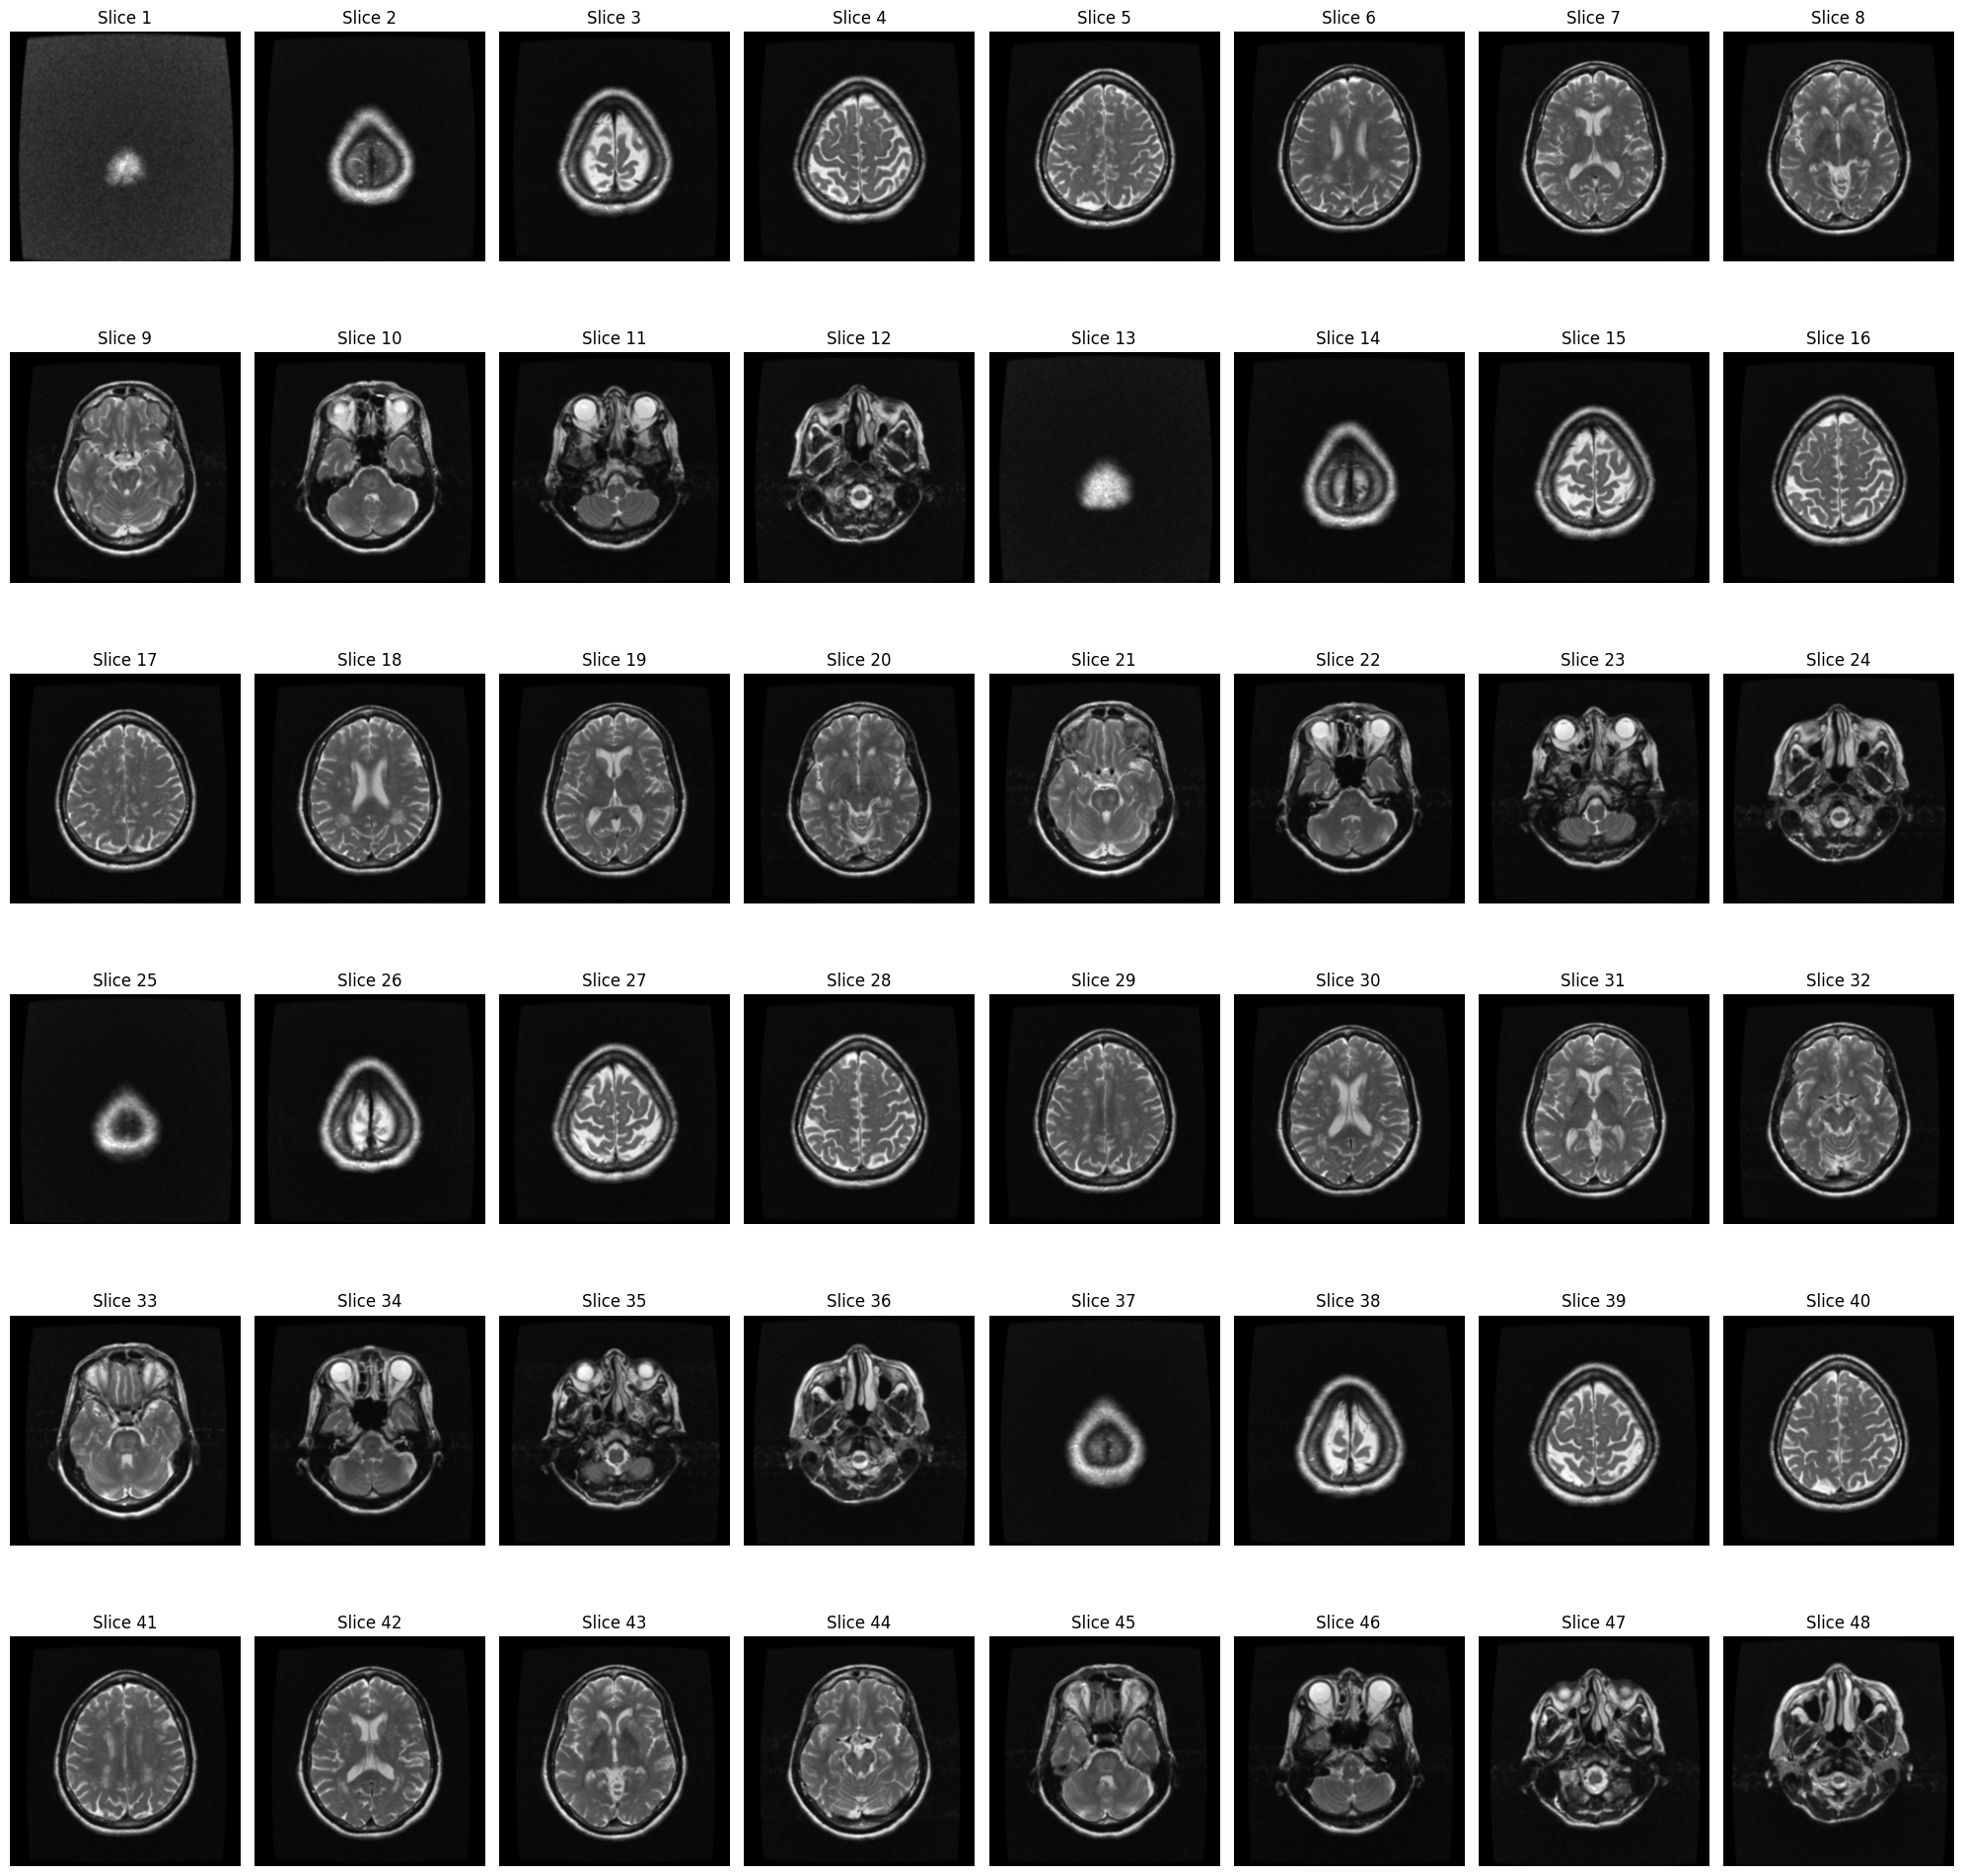

In [9]:
import nibabel as nib
import matplotlib.pyplot as plt

# Charger le fichier NIfTI
image = nib.load('/content/data/AD/I98768.nii.gz')
data = image.get_fdata()

# Obtenir le nombre de slices (coupes)
num_slices = data.shape[0]

# Définir le nombre de colonnes et de lignes pour l'affichage
n_cols = 8
n_rows = (num_slices // n_cols) + (num_slices % n_cols > 0)

# Créer une figure avec des sous-figures
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Afficher chaque slice dans une sous-figure
for i in range(num_slices):
    ax = axes[i // n_cols, i % n_cols]
    ax.imshow(data[i, :, :], cmap="gray")
    ax.set_title(f"Slice {i+1}")  # Ajouter le numéro du slice
    ax.axis('off')  # Pour ne pas afficher les axes

# Supprimer les sous-figures vides (si le nombre de slices n'est pas un multiple de n_cols)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()


In [ ]:
!mkdir /content/voxel

In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

def create_voxel_from_images(images):
    voxel_data = np.stack(images, axis=-1)
    return voxel_data

def save_voxel_as_nifti(voxel_data, output_path):
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(voxel_data, affine)
    nib.save(nifti_img, output_path)

def process_subfolders(main_folder, output_folder):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = load_images_from_folder(subfolder_path)
            voxel_data = create_voxel_from_images(images)
            output_path = os.path.join(output_folder, f"{subfolder}.nii.gz")
            save_voxel_as_nifti(voxel_data, output_path)

# Chemin vers le dossier principal contenant les sous-dossiers
main_folder = '/content/data/AD'

# Chemin vers le dossier où enregistrer les voxels
output_folder = '/content/voxel/AD'

# Traiter les sous-dossiers et enregistrer les voxels
process_subfolders(main_folder, output_folder)


In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

def create_voxel_from_images(images):
    voxel_data = np.stack(images, axis=-1)
    return voxel_data

def save_voxel_as_nifti(voxel_data, output_path):
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(voxel_data, affine)
    nib.save(nifti_img, output_path)

def process_subfolders(main_folder, output_folder):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = load_images_from_folder(subfolder_path)
            voxel_data = create_voxel_from_images(images)
            output_path = os.path.join(output_folder, f"{subfolder}.nii.gz")
            save_voxel_as_nifti(voxel_data, output_path)

# Chemin vers le dossier principal contenant les sous-dossiers
main_folder = '/content/data/CN'

# Chemin vers le dossier où enregistrer les voxels
output_folder = '/content/voxel/CN'

# Traiter les sous-dossiers et enregistrer les voxels
process_subfolders(main_folder, output_folder)


In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

def create_voxel_from_images(images):
    voxel_data = np.stack(images, axis=-1)
    return voxel_data

def save_voxel_as_nifti(voxel_data, output_path):
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(voxel_data, affine)
    nib.save(nifti_img, output_path)

def process_subfolders(main_folder, output_folder):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = load_images_from_folder(subfolder_path)
            voxel_data = create_voxel_from_images(images)
            output_path = os.path.join(output_folder, f"{subfolder}.nii.gz")
            save_voxel_as_nifti(voxel_data, output_path)

# Chemin vers le dossier principal contenant les sous-dossiers
main_folder = '/content/data/MCI'

# Chemin vers le dossier où enregistrer les voxels
output_folder = '/content/voxel/MCI'

# Traiter les sous-dossiers et enregistrer les voxels
process_subfolders(main_folder, output_folder)


### verifier

Displaying slices for /content/voxel/AD/I1334457.nii.gz


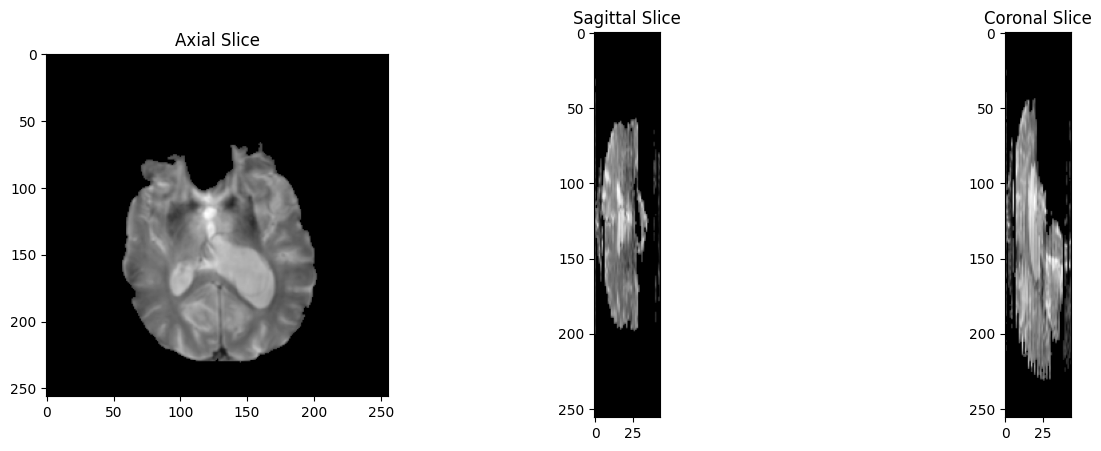

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def display_voxel_slices(voxel_data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Afficher la coupe axiale (z au milieu)
    axes[0].imshow(voxel_data[:, :, voxel_data.shape[2] // 2], cmap='gray')
    axes[0].set_title('Axial Slice')

    # Afficher la coupe sagittale (x au milieu)
    axes[1].imshow(voxel_data[voxel_data.shape[0] // 2, :, :], cmap='gray')
    axes[1].set_title('Sagittal Slice')

    # Afficher la coupe coronale (y au milieu)
    axes[2].imshow(voxel_data[:, voxel_data.shape[1] // 2, :], cmap='gray')
    axes[2].set_title('Coronal Slice')

    plt.show()

def verify_single_voxel_file(file_path):
    nifti_img = nib.load(file_path)
    voxel_data = nifti_img.get_fdata()
    print(f"Displaying slices for {file_path}")
    display_voxel_slices(voxel_data)

# Chemin vers le fichier NIfTI spécifique
nifti_file_path = '/content/voxel/AD/I1334457.nii.gz'

# Vérifier le fichier NIfTI
verify_single_voxel_file(nifti_file_path)


Displaying slices for /content/voxel/CN/I1253393.nii.gz


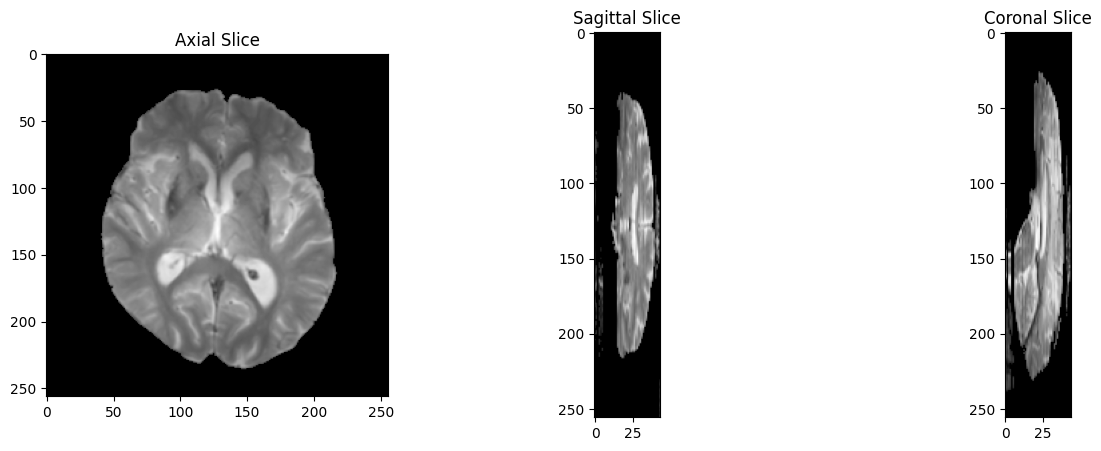

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def display_voxel_slices(voxel_data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Afficher la coupe axiale (z au milieu)
    axes[0].imshow(voxel_data[:, :, voxel_data.shape[2] // 2], cmap='gray')
    axes[0].set_title('Axial Slice')

    # Afficher la coupe sagittale (x au milieu)
    axes[1].imshow(voxel_data[voxel_data.shape[0] // 2, :, :], cmap='gray')
    axes[1].set_title('Sagittal Slice')

    # Afficher la coupe coronale (y au milieu)
    axes[2].imshow(voxel_data[:, voxel_data.shape[1] // 2, :], cmap='gray')
    axes[2].set_title('Coronal Slice')

    plt.show()

def verify_single_voxel_file(file_path):
    nifti_img = nib.load(file_path)
    voxel_data = nifti_img.get_fdata()
    print(f"Displaying slices for {file_path}")
    display_voxel_slices(voxel_data)

# Chemin vers le fichier NIfTI spécifique
nifti_file_path = '/content/voxel/CN/I1253393.nii.gz'

# Vérifier le fichier NIfTI
verify_single_voxel_file(nifti_file_path)

Displaying 3D voxel for /content/voxel/AD/I1263250.nii.gz


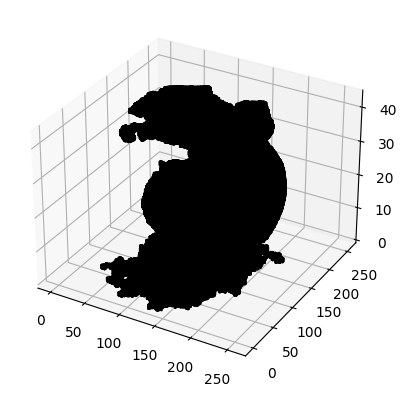

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def display_voxel_3d(voxel_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxel_data, edgecolor='k')
    plt.show()

def verify_single_voxel_file(file_path):
    nifti_img = nib.load(file_path)
    voxel_data = nifti_img.get_fdata()
    print(f"Displaying 3D voxel for {file_path}")
    display_voxel_3d(voxel_data)

# Chemin vers le fichier NIfTI spécifique
nifti_file_path = '/content/voxel/AD/I1263250.nii.gz'

# Vérifier le fichier NIfTI
verify_single_voxel_file(nifti_file_path)


Displaying 44 slices for /content/voxel/AD/I1239538.nii.gz


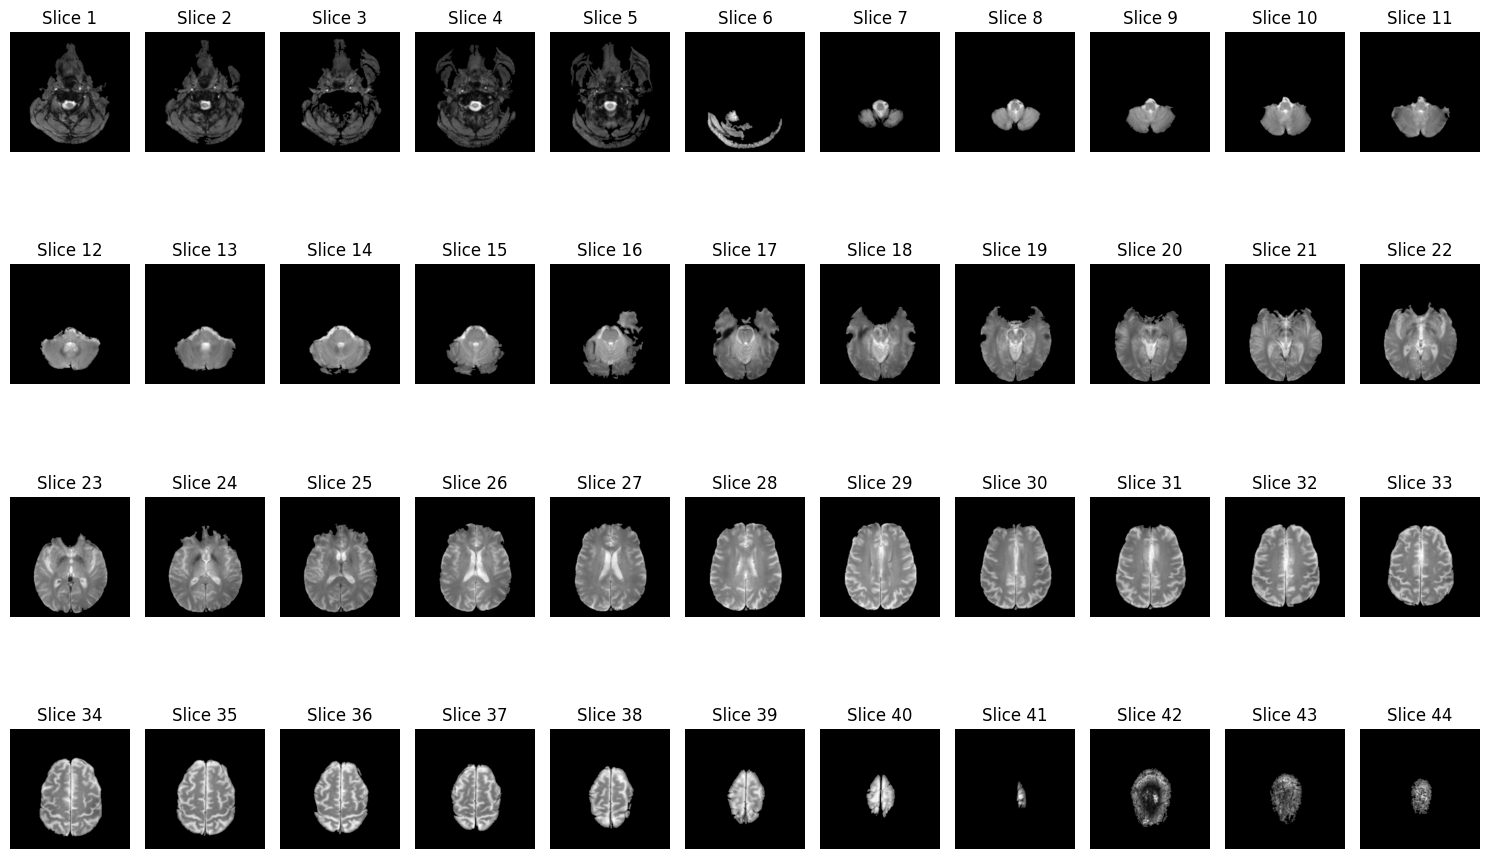

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def display_voxel_slices(voxel_data, num_slices=44):
    fig, axes = plt.subplots(4, 11, figsize=(15, 10))

    slice_idx = np.linspace(0, voxel_data.shape[2] - 1, num_slices, dtype=int)
    for i, ax in enumerate(axes.flat):
        if i < num_slices:
            ax.imshow(voxel_data[:, :, slice_idx[i]], cmap='gray')
            ax.set_title(f'Slice {slice_idx[i] + 1}')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

def verify_single_voxel_file(file_path):
    nifti_img = nib.load(file_path)
    voxel_data = nifti_img.get_fdata()
    print(f"Displaying {num_slices} slices for {file_path}")
    display_voxel_slices(voxel_data)

# Chemin vers le fichier NIfTI spécifique
nifti_file_path = '/content/voxel/AD/I1239538.nii.gz'

# Vérifier le fichier NIfTI
num_slices = 44
verify_single_voxel_file(nifti_file_path)


Displaying 44 slices for /content/voxel/CN/I1009813.nii.gz


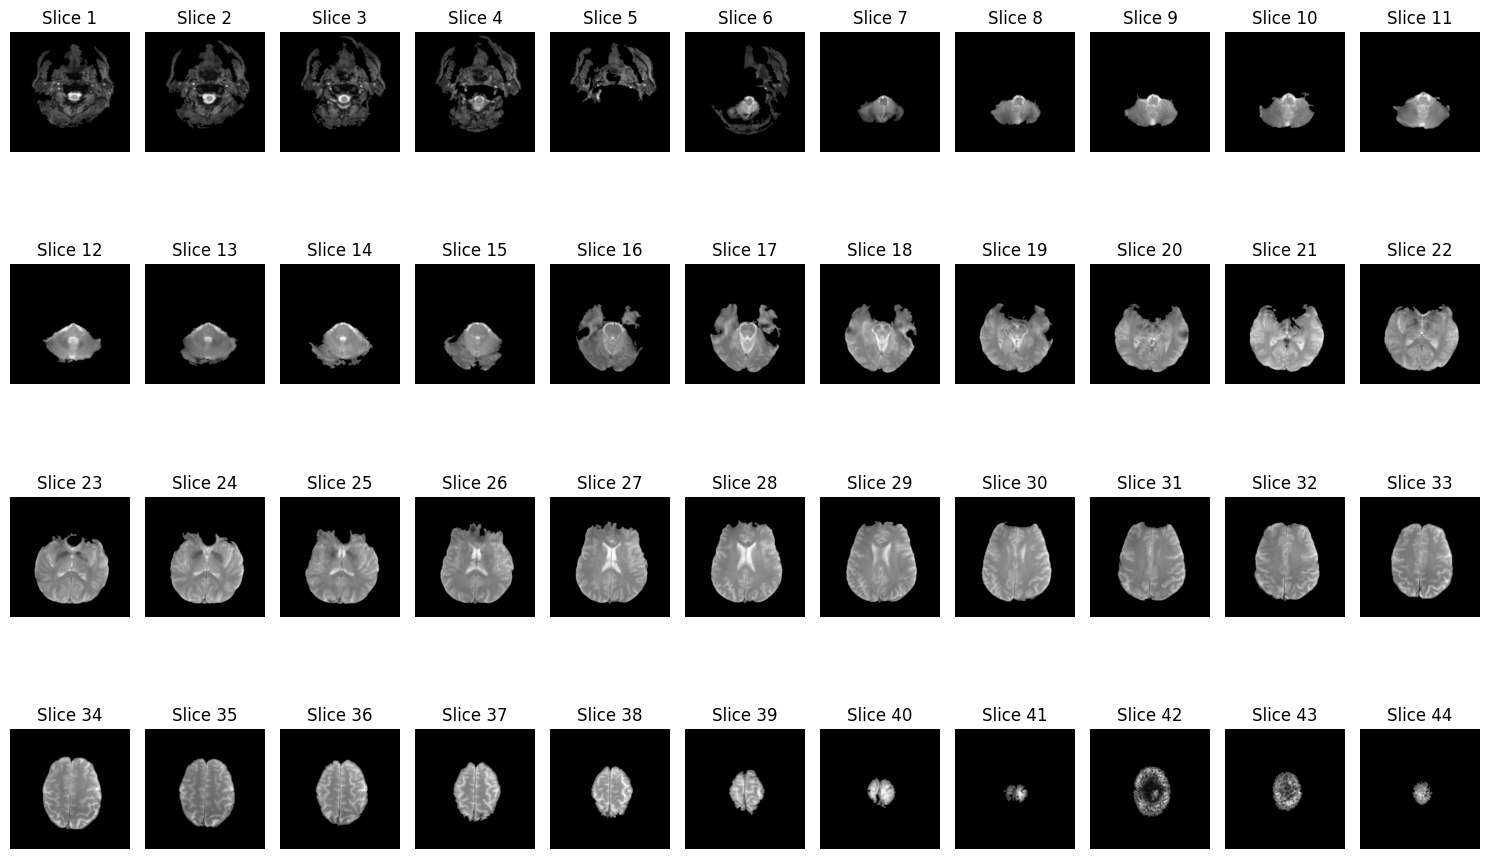

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def display_voxel_slices(voxel_data, num_slices=44):
    fig, axes = plt.subplots(4, 11, figsize=(15, 10))

    slice_idx = np.linspace(0, voxel_data.shape[2] - 1, num_slices, dtype=int)
    for i, ax in enumerate(axes.flat):
        if i < num_slices:
            ax.imshow(voxel_data[:, :, slice_idx[i]], cmap='gray')
            ax.set_title(f'Slice {slice_idx[i] + 1}')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

def verify_single_voxel_file(file_path):
    nifti_img = nib.load(file_path)
    voxel_data = nifti_img.get_fdata()
    print(f"Displaying {num_slices} slices for {file_path}")
    display_voxel_slices(voxel_data)

# Chemin vers le fichier NIfTI spécifique
nifti_file_path = '/content/voxel/CN/I1009813.nii.gz'

# Vérifier le fichier NIfTI
num_slices = 44
verify_single_voxel_file(nifti_file_path)

In [ ]:
from google.colab import drive
import shutil
import os
# Chemin du dossier à compresser
folder_to_zip = '/content/voxel'

# Chemin où le fichier ZIP sera sauvegardé
zip_output_path = '/content/voxel.zip'

# Créer le fichier ZIP
shutil.make_archive('/content/voxel', 'zip', folder_to_zip)


drive_output_path = '/content/drive/MyDrive/ADNI/voxel.zip'

shutil.move(zip_output_path, drive_output_path)

'/content/drive/MyDrive/ADNI/voxel.zip'

In [ ]:
from PIL import Image
import os

# Chemin vers votre dossier contenant les images PNG
folder_path = "/content/data/AD/I1129456"

# Liste tous les fichiers dans le dossier
files = os.listdir(folder_path)

# Parcours des fichiers
for file_name in files:
    if file_name.endswith(".png"):
        file_path = os.path.join(folder_path, file_name)
        # Ouvrir l'image
        img = Image.open(file_path)
        # Obtenir les dimensions de l'image
        width, height = img.size
        print(f"Nom du fichier: {file_name}, Dimensions: {width} x {height}")

Nom du fichier: 30.png, Dimensions: 256 x 256
Nom du fichier: 22.png, Dimensions: 256 x 256
Nom du fichier: 26.png, Dimensions: 256 x 256
Nom du fichier: 4.png, Dimensions: 256 x 256
Nom du fichier: 42.png, Dimensions: 256 x 256
Nom du fichier: 33.png, Dimensions: 256 x 256
Nom du fichier: 37.png, Dimensions: 256 x 256
Nom du fichier: 2.png, Dimensions: 256 x 256
Nom du fichier: 20.png, Dimensions: 256 x 256
Nom du fichier: 16.png, Dimensions: 256 x 256
Nom du fichier: 27.png, Dimensions: 256 x 256
Nom du fichier: 14.png, Dimensions: 256 x 256
Nom du fichier: 9.png, Dimensions: 256 x 256
Nom du fichier: 44.png, Dimensions: 256 x 256
Nom du fichier: 18.png, Dimensions: 256 x 256
Nom du fichier: 31.png, Dimensions: 256 x 256
Nom du fichier: 40.png, Dimensions: 256 x 256
Nom du fichier: 11.png, Dimensions: 256 x 256
Nom du fichier: 7.png, Dimensions: 256 x 256
Nom du fichier: 3.png, Dimensions: 256 x 256
Nom du fichier: 43.png, Dimensions: 256 x 256
Nom du fichier: 5.png, Dimensions: 256 